In [20]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water.csv


In [3]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [4]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


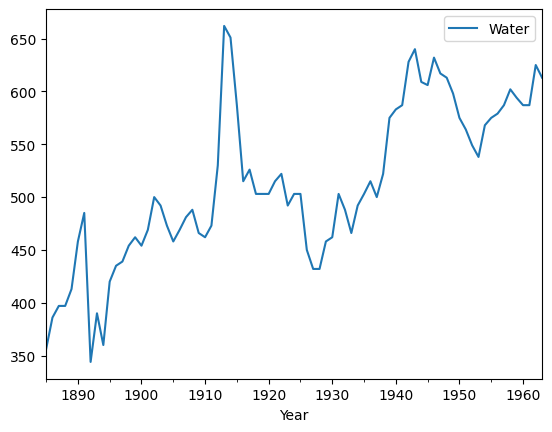

In [5]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

In [6]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

Dataset 69, Validation 10


#### Build Model based on the optimized values

In [21]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [8]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [9]:
X.shape

(69, 1)

In [10]:
from statsmodels.tsa.arima_model import ARMA

In [11]:
from statsmodels.graphics.tsaplots import plot_predict

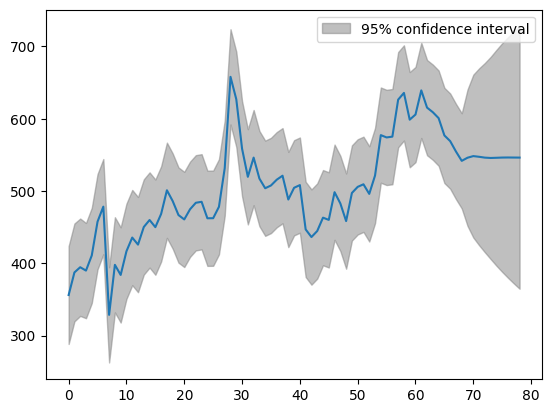

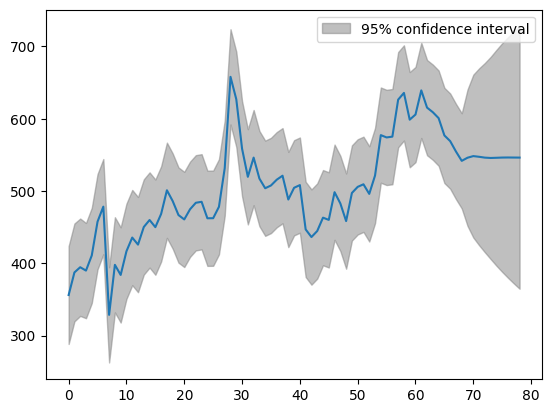

In [12]:
# fit model
model = sm.tsa.arima.ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
plot_predict(model_fit,1,79)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
#Error on the test data
val=pd.read_csv('validation.csv')
rmse = sqrt(mean_squared_error(val.Water, forecast))
rmse

48.50471198811261

#### Combine train and test data and build final model

In [15]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X1 = data.values
X1 = X1.astype('float32')

In [16]:
X1.shape

(79, 1)

In [17]:
model = sm.tsa.arima.ARIMA(X1, order=(4,1,0))
model_fit = model.fit()

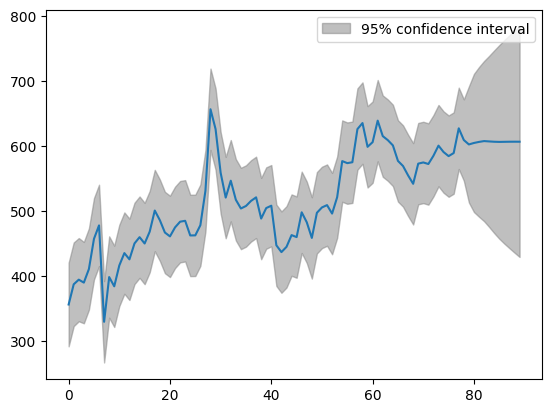

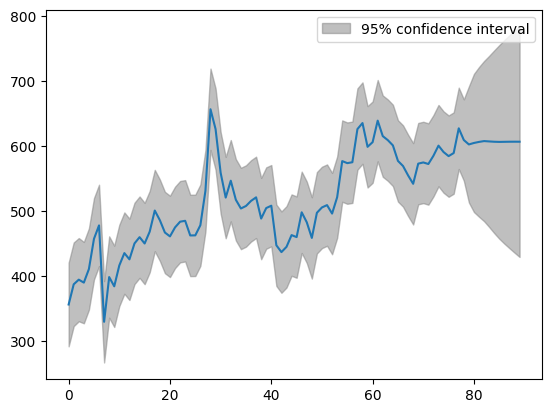

In [19]:
#forecast=model_fit.forecast(steps=10)[0]
plot_predict(model_fit,1,90)